<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/AA_PRACTICA1_GRUPO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AA_PRACTICA1_GRUPO_4

Daniel Alonso

Javier Arteaga

Marina Garrido

Elena González

### Importar librerías

In [ ]:
%tensorflow_version 2.x
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
print(tensorflow.keras.__version__)
print('GPU Available:', tensorflow.config.list_physical_devices('GPU'))
print(tensorflow.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


In [ ]:
from keras.datasets import fashion_mnist 
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras.layers.core import Flatten
from keras import metrics
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np

## Cargar los datos

Cargar los datos de Fashion MNIST en Keras. 

Hay 60K imágenes para entrenar la red y 10K para evaluar la precisión de clasificación.


In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
print('Imágenes de entrenamiento:', train_data.shape)
print('Imágenes de test:', test_data.shape)

Imágenes de entrenamiento: (60000, 28, 28)
Imágenes de test: (10000, 28, 28)


Los datos tienen forma de 60K y 10K matrices (imágenes), respectivamente, de 28 filas x 28 columnas = 784 (píxeles).

Se modifica la forma de los datos a 60K y 10K matrices, respectivamente, de matrices 28x28. Además, se normalizan los datos para facilitar que converja el entrenamiento, ya que el resultado se obtiene en porcentaje de probabilidad (valores entre 0 y 1).

In [ ]:
train_data = train_data.reshape((60000, 28 * 28))
train_data = train_data.astype('float32') / 255
test_data = test_data.reshape((10000, 28 * 28))
test_data = test_data.astype('float32') / 255
print('Imágenes de entrenamiento:', train_data.shape)
print('Imágenes de test:', test_data.shape)

Imágenes de entrenamiento: (60000, 784)
Imágenes de test: (10000, 784)


Se codifican las etiquetas de las imágenes de forma que lo pueda procesar la red. Cada etiqueta se convierte en un vector de 10 elementos (número de categorías) en el que el único valor distinto de ```0``` es un ```1``` en la posición de la categoría a la que corresponde.

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Se seleccionan 10K imágenes de entrenamiento como datos de validación para poder estudiar la precisión de la red frente a nuevos datos.

In [ ]:
# Datos de validación
val_data = train_data[:10000]
val_labels = train_labels[:10000]

# Datos de entrenamiento
train_val_data = train_data[10000:]
train_val_labels = train_labels[10000:]


## Caso 1

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model = models.Sequential()
model.add(layers.Dense(10, activation ='relu', name = 'Capa1', input_shape = (28*28,)))
model.add(layers.Dense(10, name = 'CapaSalida1', activation = 'softmax'))

model.add(Flatten())
model.output_shape


(None, 10)

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa1 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida1 (Dense)         (None, 10)                110       
                                                                 
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 2s 3ms/step - loss: 1.8724 - accuracy: 0.3568 - val_loss: 1.4650 - val_accuracy: 0.5438
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 1.1055 - accuracy: 0.6639 - val_loss: 0.8869 - val_accuracy: 0.7317
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.8020 - accuracy: 0.7444 - val_loss: 0.7354 - val_accuracy: 0.7601
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.7022 - accuracy: 0.7692 - val_loss: 0.6692 - val_accuracy: 0.7790
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6475 - accuracy: 0.7883 - val_loss: 0.6291 - val_accuracy: 0.7926


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.7808


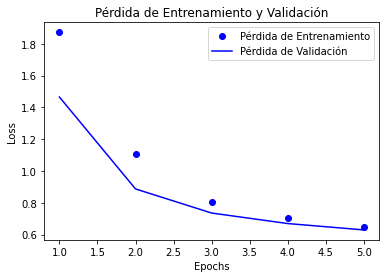

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
Valores de predicción del modelo
Matriz de confusión


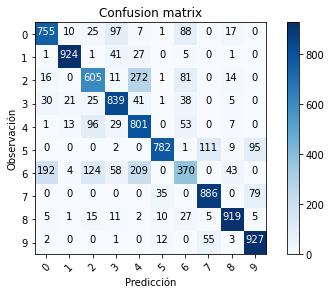

In [ ]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

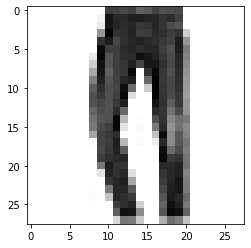

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 0s 1ms/step
Predicción del elemento 6: clase 1
[1.5701486e-03 9.6329826e-01 3.6851829e-04 1.0837999e-02 1.9751115e-02
 1.7835138e-05 4.0504690e-03 8.1603874e-05 2.3705077e-06 2.1786480e-05]
Suma de las predicciones del elemento 6: 1.0000001


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

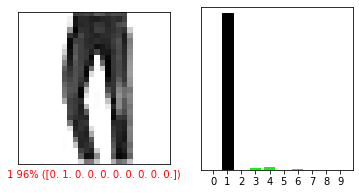

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 2

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(10, activation ='relu', name = 'Capa2', input_shape = (28*28,)))
model2.add(layers.Dense(10, name = 'CapaSalida2', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa2 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida2 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model2.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model2.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 2s 3ms/step - loss: 1.0597 - accuracy: 0.6798 - val_loss: 0.6837 - val_accuracy: 0.7774
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5852 - accuracy: 0.8014 - val_loss: 0.5436 - val_accuracy: 0.8184
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5170 - accuracy: 0.8251 - val_loss: 0.4980 - val_accuracy: 0.8317
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4833 - accuracy: 0.8366 - val_loss: 0.4880 - val_accuracy: 0.8338
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4629 - accuracy: 0.8413 - val_loss: 0.4710 - val_accuracy: 0.8388


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model2.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5016 - accuracy: 0.8279


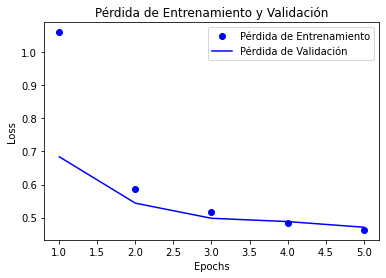

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
Valores de predicción del modelo
Matriz de confusión


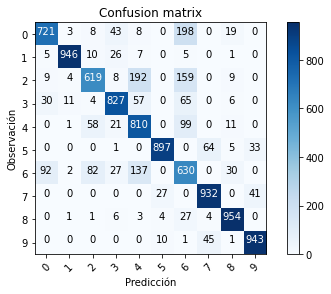

In [ ]:
Y_pred = model2.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

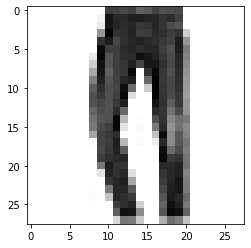

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model2.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 0s 1ms/step
Predicción del elemento 6: clase 1
[4.6655824e-04 9.9097687e-01 4.4463715e-04 1.8717691e-04 7.8032305e-03
 1.4819129e-10 1.2012521e-04 4.3562089e-13 1.4784405e-06 1.4691415e-10]
Suma de las predicciones del elemento 6: 1.0000001


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

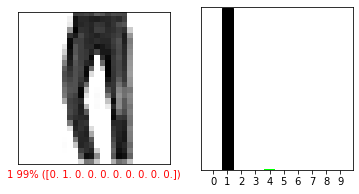

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 2.5

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model2b = models.Sequential()
model2b.add(layers.Dense(10, activation ='relu', name = 'Capa2', input_shape = (28*28,)))
model2b.add(layers.Dense(10, name = 'CapaSalida2', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model2b.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa2 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida2 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model2b.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model2b.fit(train_val_data, train_val_labels,
                    epochs = 25,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/25
391/391 [==============================] - 2s 3ms/step - loss: 0.8909 - accuracy: 0.7082 - val_loss: 0.6161 - val_accuracy: 0.7985
Epoch 2/25
391/391 [==============================] - 1s 3ms/step - loss: 0.5596 - accuracy: 0.8126 - val_loss: 0.5445 - val_accuracy: 0.8117
Epoch 3/25
391/391 [==============================] - 1s 3ms/step - loss: 0.5051 - accuracy: 0.8276 - val_loss: 0.5113 - val_accuracy: 0.8241
Epoch 4/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4766 - accuracy: 0.8367 - val_loss: 0.4706 - val_accuracy: 0.8387
Epoch 5/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4581 - accuracy: 0.8423 - val_loss: 0.4681 - val_accuracy: 0.8340
Epoch 6/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4454 - accuracy: 0.8484 - val_loss: 0.4478 - val_accuracy: 0.8478
Epoch 7/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4354 - accuracy: 0.8503 - val_loss: 0.4498 - val_accuracy: 0.8458
Epoch 

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model2b.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.8456


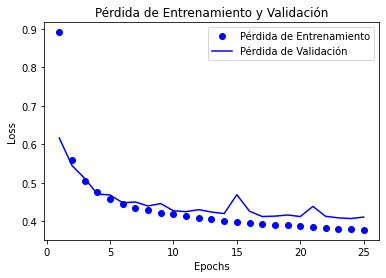

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
Valores de predicción del modelo
Matriz de confusión


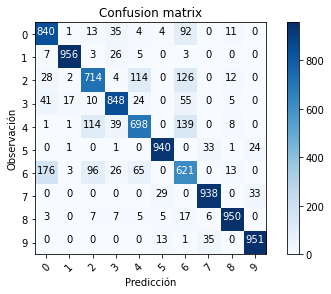

In [ ]:
Y_pred = model2b.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

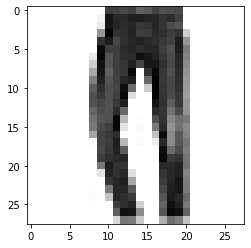

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model2b.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 0s 1ms/step
Predicción del elemento 6: clase 1
[3.9456324e-03 9.9470371e-01 2.0176769e-04 3.5539505e-04 7.7885954e-04
 4.2394350e-17 1.4595930e-05 3.5434653e-09 1.0422614e-08 3.9521919e-09]
Suma de las predicciones del elemento 6: 1.0


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

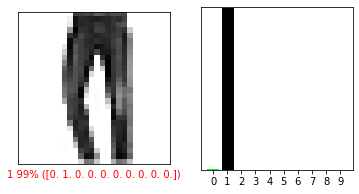

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 3

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(10, activation ='sigmoid', name = 'Capa3', input_shape = (28*28,)))
model3.add(layers.Dense(10, name = 'CapaSalida3', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa3 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida3 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model3.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model3.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 2s 4ms/step - loss: 2.2132 - accuracy: 0.2310 - val_loss: 2.0616 - val_accuracy: 0.3602
Epoch 2/5
391/391 [==============================] - 1s 4ms/step - loss: 1.9545 - accuracy: 0.4360 - val_loss: 1.8392 - val_accuracy: 0.4891
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 1.7462 - accuracy: 0.5353 - val_loss: 1.6525 - val_accuracy: 0.5731
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 1.5757 - accuracy: 0.5902 - val_loss: 1.5012 - val_accuracy: 0.6101
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 1.4387 - accuracy: 0.6156 - val_loss: 1.3802 - val_accuracy: 0.6311


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model3.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 1.3849 - accuracy: 0.6245


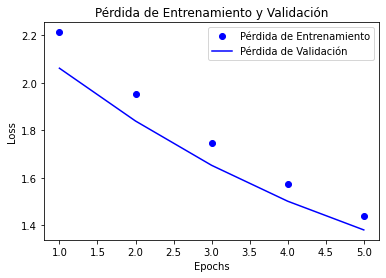

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
Valores de predicción del modelo
Matriz de confusión


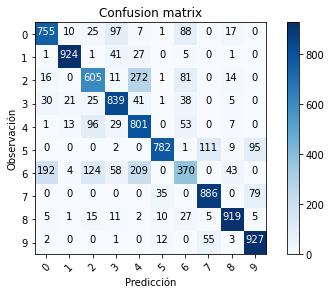

In [ ]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

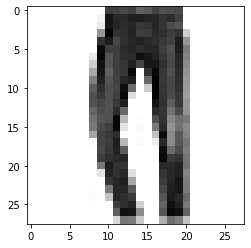

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 0s 1ms/step
Predicción del elemento 6: clase 1
[1.5701486e-03 9.6329826e-01 3.6851829e-04 1.0837999e-02 1.9751115e-02
 1.7835138e-05 4.0504690e-03 8.1603874e-05 2.3705077e-06 2.1786480e-05]
Suma de las predicciones del elemento 6: 1.0000001


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

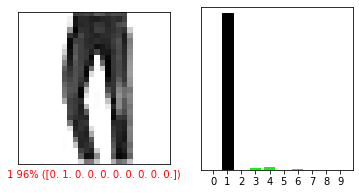

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 3.5

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:

model3b = models.Sequential()
#Capa 3b (sparse_categorical_crossentropy)
model3b.add(layers.Dense(10, activation='sigmoid', name="Capa3b",input_shape=(28*28,)))
#Capa final
model3b.add(layers.Dense(10, name="CapaSalida",activation='softmax'))
model3b.add(layers.Flatten())
model3b.output_shape

(None, 10)

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model3b.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa3b (Dense)              (None, 10)                7850      
                                                                 
 CapaSalida (Dense)          (None, 10)                110       
                                                                 
 flatten_3 (Flatten)         (None, 10)                0         
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

Probamos que pasaría si cambiamos el optimizador por 'adam' y la funcion de perdida por 'sparse_categorical_crossentropy'. El optimizador adam es una combinacion de AdaGrad y RMSProp ya que además de RMSProp, cada factor de entrenamiento también se ve afectado por el momentum del gradiente. (https://respuestasrapidas.com.mx/que-es-optimizador-adam/) La función de pérdida sparse_categorical_crossentropy, es una medida de distancia entre probabilidades al igual que categorical_crossentropy pero este caso es usado unicamente para numeros enteros.(https://ignaciogavilan.com/catalogo-de-componentes-de-redes-neuronales-iii-funciones-de-perdida/)

In [ ]:
model3b.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
model3b.fit(train_data, train_labels, epochs=5, batch_size=128)

Epoch 1/5


InvalidArgumentError: ignored

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model3b.evaluate(test_data, test_labels)

In [ ]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

In [ ]:
Y_pred = model3b.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model3b.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 4

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 10 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(10, activation ='sigmoid', name = 'Capa4', input_shape = (28*28,)))
model4.add(layers.Dense(10, name = 'CapaSalida4', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 7850 = 784 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

En el caso de la segunda capa: 110 = 10 (tamaño de los datos) x 10 (número de neuronas) + 10 (número de umbrales de activación).

In [ ]:
model4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa4 (Dense)               (None, 10)                7850      
                                                                 
 CapaSalida4 (Dense)         (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model4.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model4.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 2s 3ms/step - loss: 1.5296 - accuracy: 0.6506 - val_loss: 1.1364 - val_accuracy: 0.7660
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.9143 - accuracy: 0.7847 - val_loss: 0.7672 - val_accuracy: 0.7916
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6740 - accuracy: 0.8089 - val_loss: 0.6201 - val_accuracy: 0.8086
Epoch 4/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5695 - accuracy: 0.8235 - val_loss: 0.5505 - val_accuracy: 0.8206
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 0.5160 - accuracy: 0.8321 - val_loss: 0.5105 - val_accuracy: 0.8281


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model4.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5245 - accuracy: 0.8212


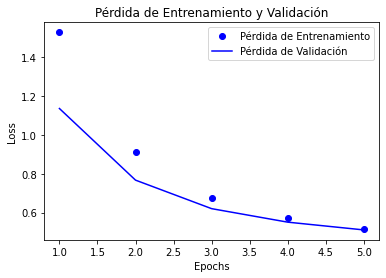

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
Valores de predicción del modelo
Matriz de confusión


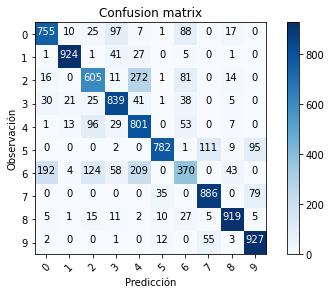

In [ ]:
Y_pred = model4.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

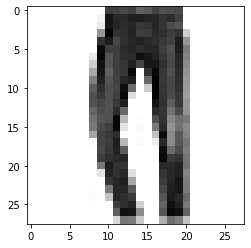

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model4.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 0s 1ms/step
Predicción del elemento 6: clase 1
[6.2962039e-03 9.7851682e-01 8.9907710e-04 5.4108649e-03 5.5254996e-03
 6.8562977e-06 2.4881342e-03 2.3528957e-04 1.6495606e-04 4.5615988e-04]
Suma de las predicciones del elemento 6: 0.9999999


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

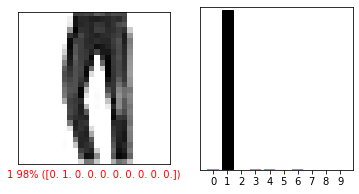

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 5

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 512 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model5 = models.Sequential()
model5.add(layers.Dense(512, activation ='relu', name = 'Capa5', input_shape = (28*28,)))
model5.add(layers.Dense(10, name = 'CapaSalida5', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [ ]:
model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa5 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida5 (Dense)         (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model5.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model5.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 4s 10ms/step - loss: 1.0667 - accuracy: 0.6788 - val_loss: 0.7629 - val_accuracy: 0.7648
Epoch 2/5
391/391 [==============================] - 5s 12ms/step - loss: 0.6890 - accuracy: 0.7806 - val_loss: 0.6399 - val_accuracy: 0.7928
Epoch 3/5
391/391 [==============================] - 3s 9ms/step - loss: 0.6047 - accuracy: 0.8048 - val_loss: 0.5862 - val_accuracy: 0.8089
Epoch 4/5
391/391 [==============================] - 6s 15ms/step - loss: 0.5597 - accuracy: 0.8158 - val_loss: 0.5470 - val_accuracy: 0.8220
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 0.5306 - accuracy: 0.8242 - val_loss: 0.5245 - val_accuracy: 0.8273


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.7808


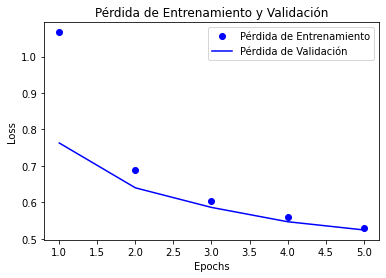

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 0s 1ms/step
Valores de predicción del modelo
Matriz de confusión


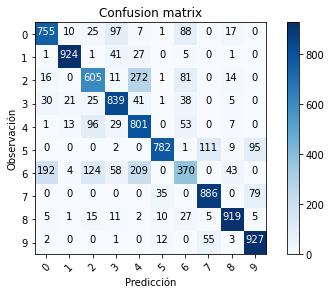

In [ ]:
Y_pred = model.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

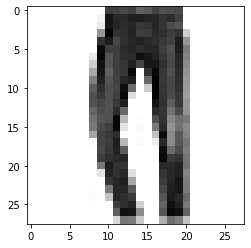

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model5.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 3ms/step
Predicción del elemento 6: clase 1
[3.3270619e-03 9.8760003e-01 5.5881060e-04 1.3451112e-03 6.2468946e-03
 7.4574364e-06 8.8897435e-04 5.3125800e-06 1.6993836e-05 3.4966970e-06]
Suma de las predicciones del elemento 6: 1.0000001


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

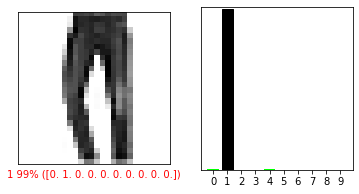

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 6

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 512 neuronas y función de activación ```relu```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model6 = models.Sequential()
model6.add(layers.Dense(512, activation ='relu', name = 'Capa6', input_shape = (28*28,)))
model6.add(layers.Dense(10, name = 'CapaSalida6', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [ ]:
model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa6 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida6 (Dense)         (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model6.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model6.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 5s 12ms/step - loss: 0.5745 - accuracy: 0.7952 - val_loss: 0.5298 - val_accuracy: 0.7944
Epoch 2/5
391/391 [==============================] - 4s 11ms/step - loss: 0.3947 - accuracy: 0.8552 - val_loss: 0.3720 - val_accuracy: 0.8655
Epoch 3/5
391/391 [==============================] - 5s 13ms/step - loss: 0.3480 - accuracy: 0.8718 - val_loss: 0.3439 - val_accuracy: 0.8761
Epoch 4/5
391/391 [==============================] - 4s 11ms/step - loss: 0.3184 - accuracy: 0.8826 - val_loss: 0.3449 - val_accuracy: 0.8745
Epoch 5/5
391/391 [==============================] - 4s 11ms/step - loss: 0.2979 - accuracy: 0.8912 - val_loss: 0.3384 - val_accuracy: 0.8749


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.7808


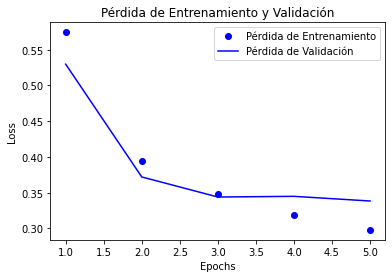

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
Valores de predicción del modelo
Matriz de confusión


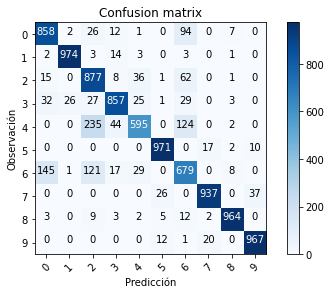

In [ ]:
Y_pred = model6.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

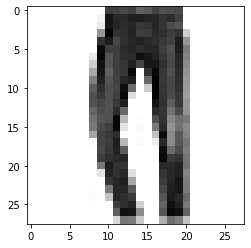

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model6.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 3ms/step
Predicción del elemento 6: clase 1
[6.6349116e-06 9.9999148e-01 2.2898629e-08 5.2170105e-07 1.0920622e-06
 9.3871785e-11 2.2505630e-07 4.8676564e-14 8.1048432e-11 7.0573301e-14]
Suma de las predicciones del elemento 6: 0.99999994


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

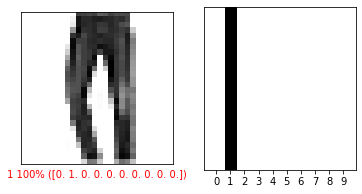

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 7

### Crear la red de neuronas

Se crea la red neuronal con una capa de 
entrada con 512 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model7 = models.Sequential()
model7.add(layers.Dense(512, activation ='sigmoid', name = 'Capa7', input_shape = (28*28,)))
model7.add(layers.Dense(10, name = 'CapaSalida7', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [ ]:
model7.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa7 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida7 (Dense)         (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model7.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model7.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/5
391/391 [==============================] - 4s 10ms/step - loss: 1.7737 - accuracy: 0.5759 - val_loss: 1.3986 - val_accuracy: 0.6587
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 1.2171 - accuracy: 0.7069 - val_loss: 1.0712 - val_accuracy: 0.7200
Epoch 3/5
391/391 [==============================] - 4s 9ms/step - loss: 0.9915 - accuracy: 0.7269 - val_loss: 0.9199 - val_accuracy: 0.7362
Epoch 4/5
391/391 [==============================] - 4s 9ms/step - loss: 0.8755 - accuracy: 0.7388 - val_loss: 0.8334 - val_accuracy: 0.7425
Epoch 5/5
391/391 [==============================] - 3s 9ms/step - loss: 0.8047 - accuracy: 0.7490 - val_loss: 0.7760 - val_accuracy: 0.7546


La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model7.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.7901 - accuracy: 0.7477


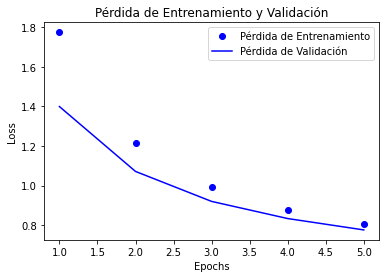

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
Valores de predicción del modelo
Matriz de confusión


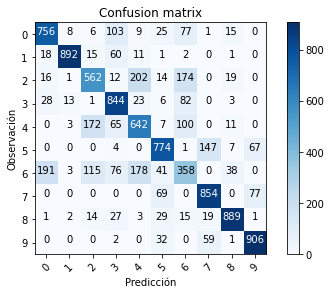

In [ ]:
Y_pred = model7.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

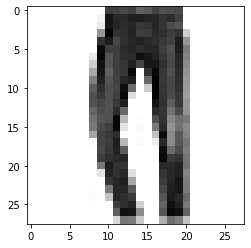

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model7.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 3ms/step
Predicción del elemento 6: clase 1
[6.3703999e-02 7.4151599e-01 1.9667026e-02 9.5675565e-02 4.3927837e-02
 9.6384028e-04 3.2216404e-02 7.6084677e-04 1.1589121e-03 4.0958388e-04]
Suma de las predicciones del elemento 6: 1.0


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

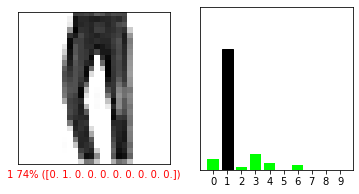

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 7.5

### Crear la red de neuronas

Se crea la red neuronal con una capa de 
entrada con 512 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model7b = models.Sequential()
model7b.add(layers.Dense(512, activation ='sigmoid', name = 'Capa7', input_shape = (28*28,)))
model7b.add(layers.Dense(10, name = 'CapaSalida7', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [ ]:
model7b.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa7 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida7 (Dense)         (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model7b.compile(optimizer = 'sgd',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model7b.fit(train_val_data, train_val_labels,
                    epochs = 25,
                    batch_size = 128,
                    validation_data = (val_data, val_labels))

Epoch 1/25
391/391 [==============================] - 4s 10ms/step - loss: 1.7895 - accuracy: 0.5524 - val_loss: 1.4010 - val_accuracy: 0.6814
Epoch 2/25
391/391 [==============================] - 4s 9ms/step - loss: 1.2182 - accuracy: 0.6993 - val_loss: 1.0709 - val_accuracy: 0.7228
Epoch 3/25
391/391 [==============================] - 3s 9ms/step - loss: 0.9917 - accuracy: 0.7235 - val_loss: 0.9192 - val_accuracy: 0.7334
Epoch 4/25
391/391 [==============================] - 3s 9ms/step - loss: 0.8758 - accuracy: 0.7369 - val_loss: 0.8326 - val_accuracy: 0.7460
Epoch 5/25
391/391 [==============================] - 3s 9ms/step - loss: 0.8055 - accuracy: 0.7467 - val_loss: 0.7760 - val_accuracy: 0.7542
Epoch 6/25
391/391 [==============================] - 3s 9ms/step - loss: 0.7575 - accuracy: 0.7530 - val_loss: 0.7410 - val_accuracy: 0.7573
Epoch 7/25
391/391 [==============================] - 3s 9ms/step - loss: 0.7224 - accuracy: 0.7598 - val_loss: 0.7076 - val_accuracy: 0.7658
Epoch

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model7b.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5496 - accuracy: 0.8060


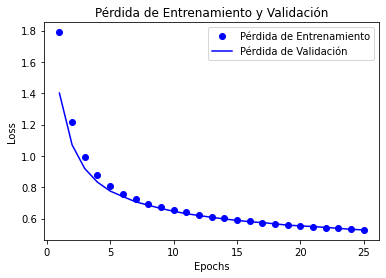

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
Valores de predicción del modelo
Matriz de confusión


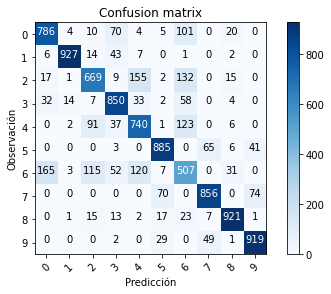

In [ ]:
Y_pred = model7b.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

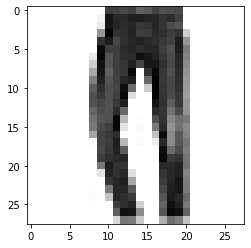

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model7b.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 3ms/step
Predicción del elemento 6: clase 1
[6.2911315e-03 9.7520256e-01 1.3679471e-03 4.5774151e-03 1.1252260e-02
 3.1324223e-06 1.2764327e-03 8.0710261e-06 1.9323830e-05 1.6630870e-06]
Suma de las predicciones del elemento 6: 1.0


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

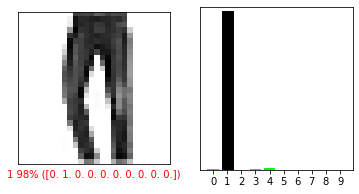

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

## Caso 8

### Crear la red de neuronas

Se crea la red neuronal con una capa de entrada con 512 neuronas y función de activación ```sigmoid```, y una capa de salida con función de activación ```softmax```.

In [ ]:
model8 = models.Sequential()
model8.add(layers.Dense(512, activation ='sigmoid', name = 'Capa8', input_shape = (28*28,)))
model8.add(layers.Dense(10, name = 'CapaSalida8', activation = 'softmax'))

### Explicar model.summary()


El resumen del modelo indica el número de parámetros de salida de cada capa. Este número es igual al tamaño de los datos de entrada multiplicado por el número de neuronas, y sumando el número de umbrales de activación de la capa.


En el caso de la primera capa: 401920 = 784 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

En el caso de la segunda capa: 262656 = 512 (tamaño de los datos) x 512 (número de neuronas) + 512 (número de umbrales de activación).

In [ ]:
model8.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Capa8 (Dense)               (None, 512)               401920    
                                                                 
 CapaSalida8 (Dense)         (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Se definen las funciones del optimizador, la pérdida y la métrica.

In [ ]:
model8.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

### Entrenar la red

Para entrenar la red se realizan ```5``` ciclos con lotes de ```128``` imágenes. Se compara con los datos de validación para controlar el sobreentrenamiento. 

In [ ]:
history = model8.fit(train_val_data, train_val_labels,
                    epochs = 5,
                    batch_size = 524,
                    validation_data = (val_data, val_labels))

Epoch 1/5
96/96 [==============================] - 4s 39ms/step - loss: 0.3244 - accuracy: 0.8827 - val_loss: 0.3717 - val_accuracy: 0.8616
Epoch 2/5
96/96 [==============================] - 3s 29ms/step - loss: 0.3196 - accuracy: 0.8827 - val_loss: 0.3639 - val_accuracy: 0.8667
Epoch 3/5
96/96 [==============================] - 3s 32ms/step - loss: 0.3141 - accuracy: 0.8848 - val_loss: 0.3401 - val_accuracy: 0.8751
Epoch 4/5
96/96 [==============================] - 3s 28ms/step - loss: 0.3070 - accuracy: 0.8878 - val_loss: 0.3303 - val_accuracy: 0.8783
Epoch 5/5
96/96 [==============================] - 3s 28ms/step - loss: 0.3012 - accuracy: 0.8891 - val_loss: 0.3281 - val_accuracy: 0.8819


Al aumentar el batch_size a 524 la precisión del modelo aumenta.

La pérdida indica el porcentaje de errores entre las etiquetas y las predicciones del modelo.

La precisión indica el porcentaje de aciertos entre las predicciones y las etiquetas.

In [ ]:
test_loss, test_acc = model8.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8704


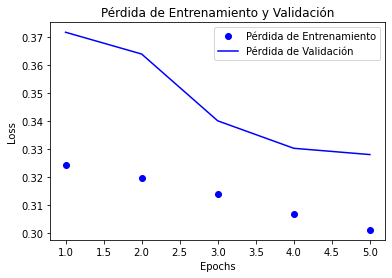

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azun"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Predecir valores

Imprimir la matriz de confusión, que muestra los valores predichos frente a los reales.

In [ ]:
# Note, this code is taken straight from the SKLEARN website, an nice way of 
# viewing confusion matrix.
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize = True`.
    '''
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

313/313 [==============================] - 1s 3ms/step
Valores de predicción del modelo
Matriz de confusión


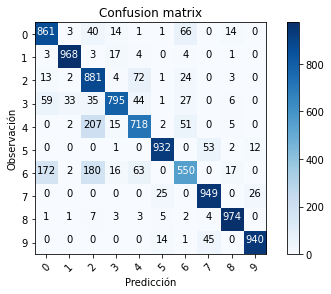

In [ ]:
Y_pred = model8.predict(test_data)
print('Valores de predicción del modelo')
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print('Matriz de confusión')
plot_confusion_matrix(confusion_mtx, classes = range(10))

Se grafica el elemento 6 (```test_data[5]```) para comprobar las soluciones. 

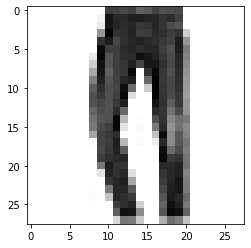

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
digit = test_data.reshape(10000,28, 28)[5]
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()
print(test_labels[5])

La clase del elemento 6 es la clase 1 (pantalones).

In [ ]:
predictions = model8.predict(test_data)
print('Predicción del elemento 6: clase', np.argmax(predictions[5]))
print(predictions[5])
print('Suma de las predicciones del elemento 6:', np.sum(predictions[5]))

313/313 [==============================] - 1s 3ms/step
Predicción del elemento 6: clase 1
[9.5273199e-04 9.9876368e-01 8.8163273e-05 6.8759327e-05 1.0342503e-04
 3.9242907e-09 2.2170978e-05 2.6210438e-07 7.8846108e-07 3.1833867e-09]
Suma de las predicciones del elemento 6: 1.0


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap = plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color = color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#00FF00')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.argmax(true_label)].set_color('black')

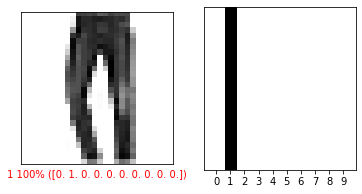

In [ ]:
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_data.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5],  test_labels)
plt.show()

# Conclusiones


En la siguiente tabla observamos los distintos casos con su valor de pérdida y su precisión. 

> 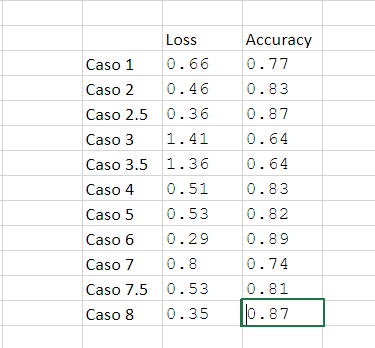



*   En los casos 1 y 2 ambos tienen capas de 10 neuronas y función de activación 
'relu' , lo que cambia es el optimizador. En el caso 1, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.77 y el del caso 2, el 'rmsprop' con una precisión de 0.83. Por tanto podemos concluir que es más preciso el 'sgd'.
*   En los casos 3 y 4 ambos tienen capas de 10 neuronas y función de activación 'sigmoid' , lo que cambia es el optimizador. En el caso 3, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.64 y el del caso 4, el 'rmsprop' con una precisión de 0.83. Por tanto podemos concluir que es más preciso el optimizador 'sgd'.
*  Comparando la función de activación'relu' y 'sigmoid' de los casos 1, 2, 3 y 4. La función de activación 'relu'(acc 0.77) tiene mayor precisión que 'sigmoid' (acc 0.64)


*   En los casos 5 y 6 ambos tienen capas de 512 neuronas y función de activación 'relu' , lo que cambia es el optimizador. En el caso 5, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.82 y el del caso 6, el 'rmsprop' con una precisión 0.89. Por tanto podemos concluir que es más preciso el optimizador 'rmsprop'.
*   En los casos 7 y 8 ambos tienen capas de 512 neuronas y función de activación 'sigmoid' , lo que cambia es el optimizador. En el caso 7, el optimizador es el 'sgd' y observamos que tiene una precisión de 0.74 y el del caso 8, el 'rmsprop' con una precisión 0.81. Por tanto podemos concluir que es más preciso el optimizador 'rmsprop'.

*   Comparando la función de activación'relu' y 'sigmoid' de los casos 5, 6, 7 y 8. La función de activación 'relu' tiene mayor precisión que 'sigmoid'.

*  En los casos 2.5, 7.5 añadimos 25 épocas lo que nos lleva al sobreentrenamiento de nuestro modelo.

*   Por último, observamos que los modelos con 10 neuronas son menos precisas que los modelos con 512 neuronas.







